<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Section
===

In [1]:
import pandas as pd
import numpy as np
import os
import copy
import math
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re
from sklearn import preprocessing

Load and split
===

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#cd "drive/My Drive/Colab Notebooks/DS/Project/Data"

In [6]:
#pwd = %pwd
#if pwd != 'C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project\\data':
#    %cd ./data

In [7]:
# load data
path = "./data"
file_list = os.listdir(path)
data_tmp = []
for file in file_list:
    df = pd.read_csv(os.path.join(path,file))
    data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)

In [8]:
final_df.describe(include="all")

,title,runtime,des,date,genre,cast,director,vote,gross,rating
count,80000,80000,79998,80000.000000,80000,78548,56976,8.000000e+04,4535,80000.000000
unique,61910,559,58362,NaN,1019,63173,36757,NaN,1279,NaN
top,Run,0,Add a Plot,NaN,Documentary,Josh Oreck,Kevin Dunn,NaN,$0.01M,NaN
freq,14,7366,8320,NaN,5452,26,100,NaN,346,NaN
mean,NaN,NaN,NaN,2014.018125,NaN,NaN,NaN,4.747766e+03,NaN,4.123375
std,NaN,NaN,NaN,24.784088,NaN,NaN,NaN,3.702567e+04,NaN,3.429486
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
50%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,1.300000e+01,NaN,5.500000
75%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,1.900000e+02,NaN,7.200000


In [9]:
df = final_df.copy()
df = df[df.rating != 0]
df = df.drop_duplicates(subset=None,keep="first")
df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,367705,NaN,8.6
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1625366,NaN,9.3
2,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,513501,$620.18M,7.0
3,Captain America: The First Avenger,124,"Steve Rogers, a rejected military soldier ...",2011,"Action, Adventure, Sci-Fi","Chris Evans, Hugo Weaving, Samuel L. Jackson, ...",Joe Johnston,695269,$176.65M,6.9
4,Jack Ryan,60,"An up-and-coming CIA analyst, Jack Ryan, i...",2018,"Action, Drama, Thriller","John Krasinski, Wendell Pierce, John Hoogenakk...",NaN,72098,NaN,8.1


In [10]:
# Tách X và y
y_sr = df["rating"] # sr là viết tắt của series
X_df = df.drop("rating", axis=1)

In [11]:
# Tách tập train chiếm 60%
#  Tập val chiếm 20%, tập test chiếm 20%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.4, 
                                                              stratify=y_sr, random_state=0)

val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(val_X_df, val_y_sr, test_size=0.5, 
                                                              stratify=val_y_sr, random_state=0)

In [12]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26072 entries, 57326 to 9642
Data columns (total 9 columns):
title       26072 non-null object
runtime     26072 non-null object
des         26072 non-null object
date        26072 non-null int64
genre       26072 non-null object
cast        25803 non-null object
director    19165 non-null object
vote        26072 non-null int64
gross       2428 non-null object
dtypes: int64(2), object(7)
memory usage: 2.0+ MB


In [13]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8691 entries, 23974 to 46310
Data columns (total 9 columns):
title       8691 non-null object
runtime     8691 non-null object
des         8691 non-null object
date        8691 non-null int64
genre       8691 non-null object
cast        8603 non-null object
director    6390 non-null object
vote        8691 non-null int64
gross       750 non-null object
dtypes: int64(2), object(7)
memory usage: 679.0+ KB


In [14]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
57326,Breathin': The Eddy Zheng Story,61,Arrested at 16 and tried as an adult for kidna...,2016,"Documentary, Crime",Ben Wang,NaN,5,NaN
64206,Engineering Disasters,43,"Spun off from Modern Marvels, Engineering ...",2015,"Documentary, History",Phil Derner,NaN,40,NaN
14274,Train to Stockholm,69,A peculiar young man returns to his birthp...,2011,"Adventure, Drama, Romance","Mikael Ayele, Sonja Ghaderi, Anders Hörbo, Any...",Erik Reese,27,NaN
48317,Mad,84,A matriarch past the point of a nervous br...,2016,"Comedy, Drama","Jennifer Lafleur, Maryann Plunkett, Eilis Cahi...",Robert G. Putka,129,NaN
71490,Bang Bang Baby,90,A small town teenager in the 1960s believe...,2014,"Drama, Fantasy, Musical","Jane Levy, Justin Chatwin, David Reale, Peter ...",Jeffrey St. Jules,493,NaN


In [15]:
genre_rating_df = train_X_df["genre"].to_frame().join(train_y_sr)

In [16]:
genre_rating_df.head()

,genre,rating
57326,"Documentary, Crime",8.0
64206,"Documentary, History",6.8
14274,"Adventure, Drama, Romance",7.4
48317,"Comedy, Drama",6.5
71490,"Drama, Fantasy, Musical",5.0


Investigating the influence of some features into ratings
===

Counter({'Comedy': 8509, 'Documentary': 7434, 'Drama': 6813, 'Action': 5750, 'Short': 5488, 'Adventure': 4313, 'Crime': 3634, 'Animation': 3539, 'Romance': 2914, 'Biography': 2902, 'Thriller': 1170, 'Horror': 1139, 'Family': 1105, 'History': 1101, 'Fantasy': 970, 'Sci-Fi': 812, 'Music': 796, 'Mystery': 694, 'Sport': 471, 'Musical': 174, 'Reality-TV': 170, 'War': 168, 'News': 168, 'Talk-Show': 79, 'Western': 67, 'Game-Show': 40})
len =  26


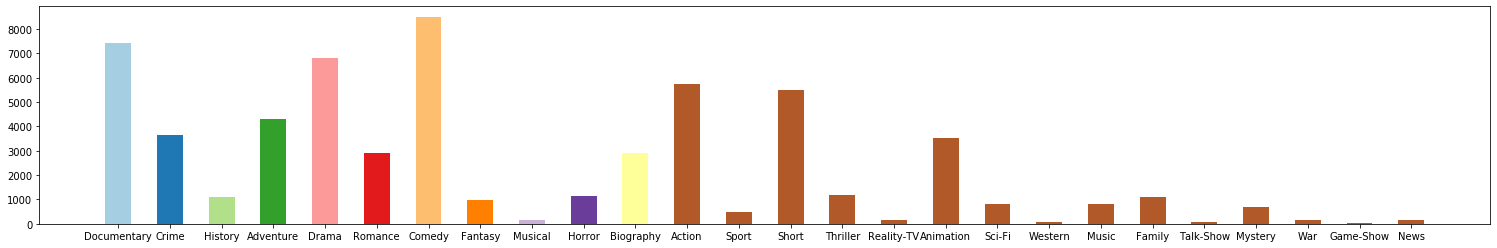

In [17]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

**The impact of genres on rating**

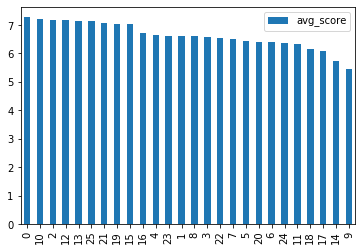

In [18]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [19]:
print(hist_df)

          genre  avg_score
0   Documentary   7.283535
10    Biography   7.215851
2       History   7.186649
12        Sport   7.168365
13        Short   7.146283
25         News   7.137500
21    Talk-Show   7.084810
19        Music   7.028141
15   Reality-TV   7.022353
16    Animation   6.730630
4         Drama   6.634860
23          War   6.613095
1         Crime   6.611035
8       Musical   6.609195
3     Adventure   6.591537
22      Mystery   6.538184
7       Fantasy   6.493505
5       Romance   6.429959
20       Family   6.406244
6        Comedy   6.389329
24    Game-Show   6.367500
11       Action   6.330991
18      Western   6.164179
17       Sci-Fi   6.074261
14     Thriller   5.728974
9        Horror   5.449166


- Nhận xét: 

Những thể loại có số lượng ít như Talk show, News, ... lại có trung bình rating cao. Nên thật khó để gom những thể loại ít thành 1 thể loại chung.

Feature Engineering
===

Compute IF-IDF of specific columns

In [20]:
class tf_idf(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X_df, y=None):
    self.vectorizer = []
    for column in self.columns:
      tf = TfidfVectorizer()
      self.vectorizer.append(tf.fit(X_df[column]))
    return self
  def transform(self, X_df, y=None):
    new_X_df = X_df.copy()
    for i, column in enumerate(self.columns):
      transformed = self.vectorizer[i].transform(new_X_df[column])
      new_X_df[column] = [transformed[j].sum() for j in range(len(new_X_df))]
    return new_X_df

Preprocessing pipeline:
  - Compute IF-IDF of text features (genre, cast, director).
  - Filling missing values by median of its columns.
  - Standard Scaling in order to help SGD, ... converging more easily.

In [21]:
columns = ['genre','cast','director']
preprocess_pipeline= Pipeline(steps=[('compute_tfidf', tf_idf(columns)),
                                     ('imputing',SimpleImputer(missing_values = 0, strategy='median')),
                                     ("scaling",StandardScaler())])

In [22]:
#replace NaN element in cast to "other"
def fill_na(df):
  df = df.drop(columns=['title','des','vote']) # not necessary for predicting
  df["director"] = df["director"].fillna("other_director");
  df["cast"] = df["cast"].fillna("other_cast");
  df["gross"] = df["gross"].fillna("0.0");
  #define money
  money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
  for i in range(len(df)):
      
      df.gross.iloc[i] = float(re.findall("\d+\.\d+", df.gross.iloc[i])[0]) * money[df.gross.iloc[i][-1]]
  return df

In [23]:
# pipeline for RandomForest
full_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", RandomForestRegressor(max_depth=10))])

In [24]:
#pipeline for linear regression
linear_regress_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", LinearRegression())])

Predict
===

##**Experiment with Linear Regression Model**

In [25]:
%%time
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
linear_regress_pipeline.fit(filled_train_X_df, train_y_sr)
val_scr = (1- linear_regress_pipeline.score(filled_val_X_df, val_y_sr))*100
train_scr = (1 -  linear_regress_pipeline.score(filled_train_X_df, train_y_sr)) * 100

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Wall time: 54.2 s


In [26]:
print("Score on train set: {}".format(train_scr))
print("Score on val set: {}".format(val_scr))

Score on train set: 95.2751027403954
Score on val set: 95.83427569364996


In [27]:
# get predictions
linear_preds = linear_regress_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

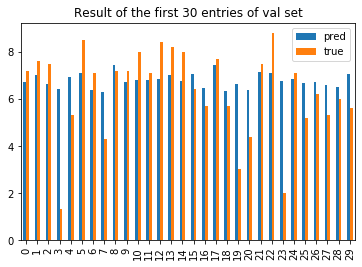

In [28]:
linear_pred_df = pd.DataFrame(columns =['pred','true'])
linear_pred_df['pred'] = linear_preds[:30]
linear_pred_df['true'] = list(val_y_sr[:30])
linear_pred_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

##**Experiment RandomForest Model** (about 17mins to run)
  - Choose the best model by tuning the depth and number of tree in forest.
  - There are four choices of depth: 10, 20, 30, 40.
  - Number of trees: 40, 50, 60.
  - We decided these values because of the computational cost.

In [29]:
%%time
max_depth = [10,20,30,40]
n_estimators = [40, 50, 60]
best_depth = 0
val_scr = []
train_scr = []
best_val_scr = float('inf')
best_train_scr = float('inf')
best_estimator = 0
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
for estimator in n_estimators:
  print("estimator: {}".format(estimator))
  for depth in max_depth:
    print("depth: {}".format(depth))
    full_pipeline.set_params(regress__n_estimators=estimator, regress__max_depth=depth)
    full_pipeline.fit(filled_train_X_df,train_y_sr)
    cur_train_scr = (full_pipeline.score(filled_train_X_df, train_y_sr))
    train_scr.append(cur_train_scr)
    cur_val_scr = (full_pipeline.score(filled_val_X_df, val_y_sr))
    if cur_train_scr < best_train_scr:
      best_train_scr = cur_train_scr
    val_scr.append(cur_val_scr)
    if cur_val_scr < best_val_scr:
      best_val_scr = cur_val_scr
      best_estimator = estimator
      best_depth = depth


D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


estimator: 40
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 50
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 60
depth: 10
depth: 20
depth: 30
depth: 40
Wall time: 6min 41s


In [30]:
print("best depth: {}".format(best_depth))
print("best estimator: {}".format(best_estimator))
print("Score on train set: {}".format(best_train_scr))
print("Score on val set: {}".format(best_val_scr))

best depth: 10
best estimator: 50
Score on train set: 0.3165178699301192
Score on val set: 0.15606526996484427


In [31]:
# train again with best_depth and best_estimator
full_pipeline.set_params(regress__n_estimators=best_estimator, regress__max_depth=best_depth)
full_pipeline.fit(filled_train_X_df,train_y_sr)
forest_preds = full_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

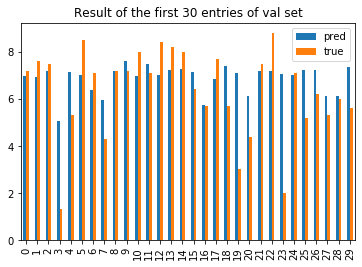

In [32]:
randomforest_df = pd.DataFrame(columns =['pred','true'])
randomforest_df['pred'] = forest_preds[:30]
randomforest_df['true'] = list(val_y_sr[:30])
randomforest_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

Plot results of both linear regression and Randomforest in validation set

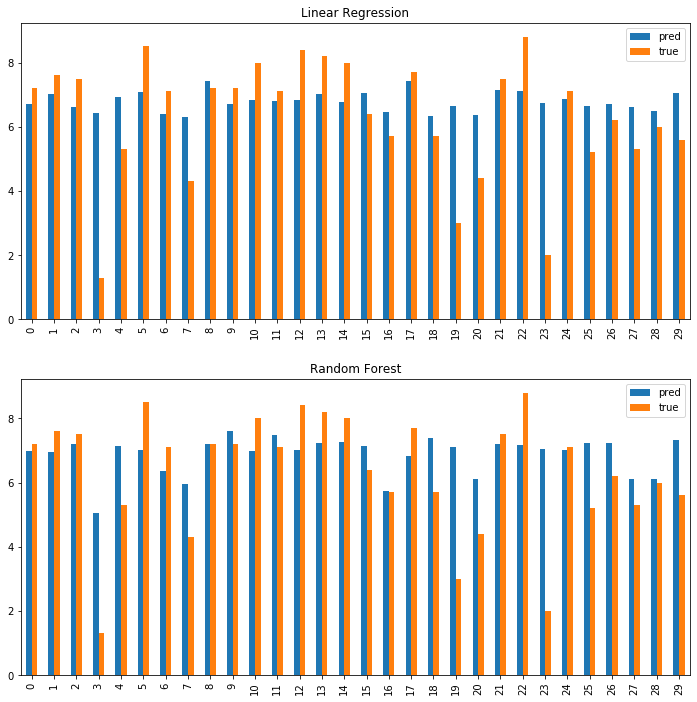

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1)
linear_pred_df[["pred","true"]].plot(ax=axes[0],kind='bar', title="Linear Regression",figsize=(12,12))
randomforest_df[["pred", "true"]].plot(ax=axes[1], kind='bar', title='Random Forest');

Nhận xét: Với Random Forest mô hình cho kết quả tốt nhất.

Train Random Forest trên tập dữ liệu (train + val)

Sau đó test trên tập test

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_wit

Score on test set: 0.17524879592118114


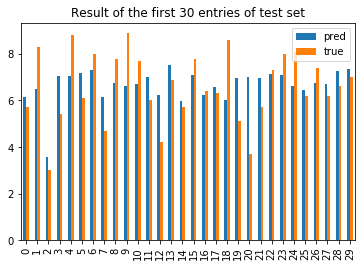

In [34]:
# train with best_depth and best_estimator
full_pipeline.set_params(regress__n_estimators=best_estimator, regress__max_depth=best_depth)
#join train+val dataset
join_X_df = train_X_df.append(val_X_df)
filled_join_X_df = fill_na(join_X_df)
join_y_sr = train_y_sr.append(val_y_sr)

full_pipeline.fit(filled_join_X_df,join_y_sr)
#predict on test dataset
forest_preds = full_pipeline.predict(fill_na(test_X_df))
#visualize
randomforest_df = pd.DataFrame(columns =['pred','true'])
randomforest_df['pred'] = forest_preds[:30]
randomforest_df['true'] = list(test_y_sr[:30])
randomforest_df.plot.bar()
plt.title("Result of the first 30 entries of test set")

test_scr = full_pipeline.score(fill_na(test_X_df), test_y_sr)
print("Score on test set: {}".format(test_scr))


# Working with test set in future (unlabeled)

In [35]:

path = "./test"
#file_list = os.listdir("../testdata")
file_list = os.listdir(path)
data_tmp = []
for file in file_list:
    
    df = pd.read_csv(os.path.join(path,file))
    data_tmp.append(df)
test_X_df = pd.concat(data_tmp, axis = 0, ignore_index=True)


In [36]:
test_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
0,Tenet,0,An action epic revolving around internatio...,2020,"Action, Drama, Thriller","Elizabeth Debicki, Robert Pattinson, Aaron Tay...",Christopher Nolan,0,NaN
1,No Time to Die,0,Bond has left active service. His peace is...,2020,"Action, Adventure, Thriller","Ana de Armas, Daniel Craig, Léa Seydoux, Rami ...",Cary Joji Fukunaga,0,NaN
2,Birds of Prey: And the Fantabulous Emancipatio...,0,"After splitting with the Joker, Harley Qui...",2020,"Action, Adventure, Crime","Margot Robbie, Mary Elizabeth Winstead, Ewan M...",Cathy Yan,0,NaN
3,Black Widow,0,A film about Natasha Romanoff in her quest...,2020,"Action, Adventure, Sci-Fi","Florence Pugh, Scarlett Johansson, Robert Down...",Cate Shortland,0,NaN
4,Top Gun: Maverick,0,After more than thirty years of service as...,2020,"Action, Drama","Tom Cruise, Jennifer Connelly, Val Kilmer, Jea...",Joseph Kosinski,0,NaN


In [37]:
test_pred =full_pipeline.predict(fill_na(test_X_df))

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Visualize result of test set

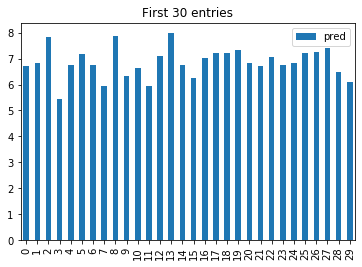

In [38]:
test_pred_df = pd.DataFrame(test_pred, columns=["pred"])
test_pred_df[:30].plot(kind = 'bar', title ='First 30 entries')

In [39]:
test_pred_df.to_csv("result.csv",header = True)